### PCA (Core)
## Reducción de Dimensionalidad
### Descripción:
En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset «Wine Quality» disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.
Enlace al dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

### Objetivo:
El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.

### Instrucciones:
1. Carga de datos:
* Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
* El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

In [44]:
# Importamos las librerias a utilizar
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../data/winequality-red.csv')
# Revisamos las primeras columnas para corroborar que cargo bien el dataset
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

2. Exploración y preprocesamiento de datos:
* Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
* Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

In [3]:
# Contamos cuantos valores nulos existen por columna
cantNulos = df.isnull().sum()
print(f'Valores nulos en el Dataset:\n{cantNulos}')

# Exploramos las estadisticas del dataset completo. Usamos .T Para verificar los datos de una forma mas cómoda
descripcionDataset =  df.describe()
print(f'Distribución estadística de los datos:\n{descripcionDataset}')

Valores nulos en el Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Distribución estadística de los datos:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000 

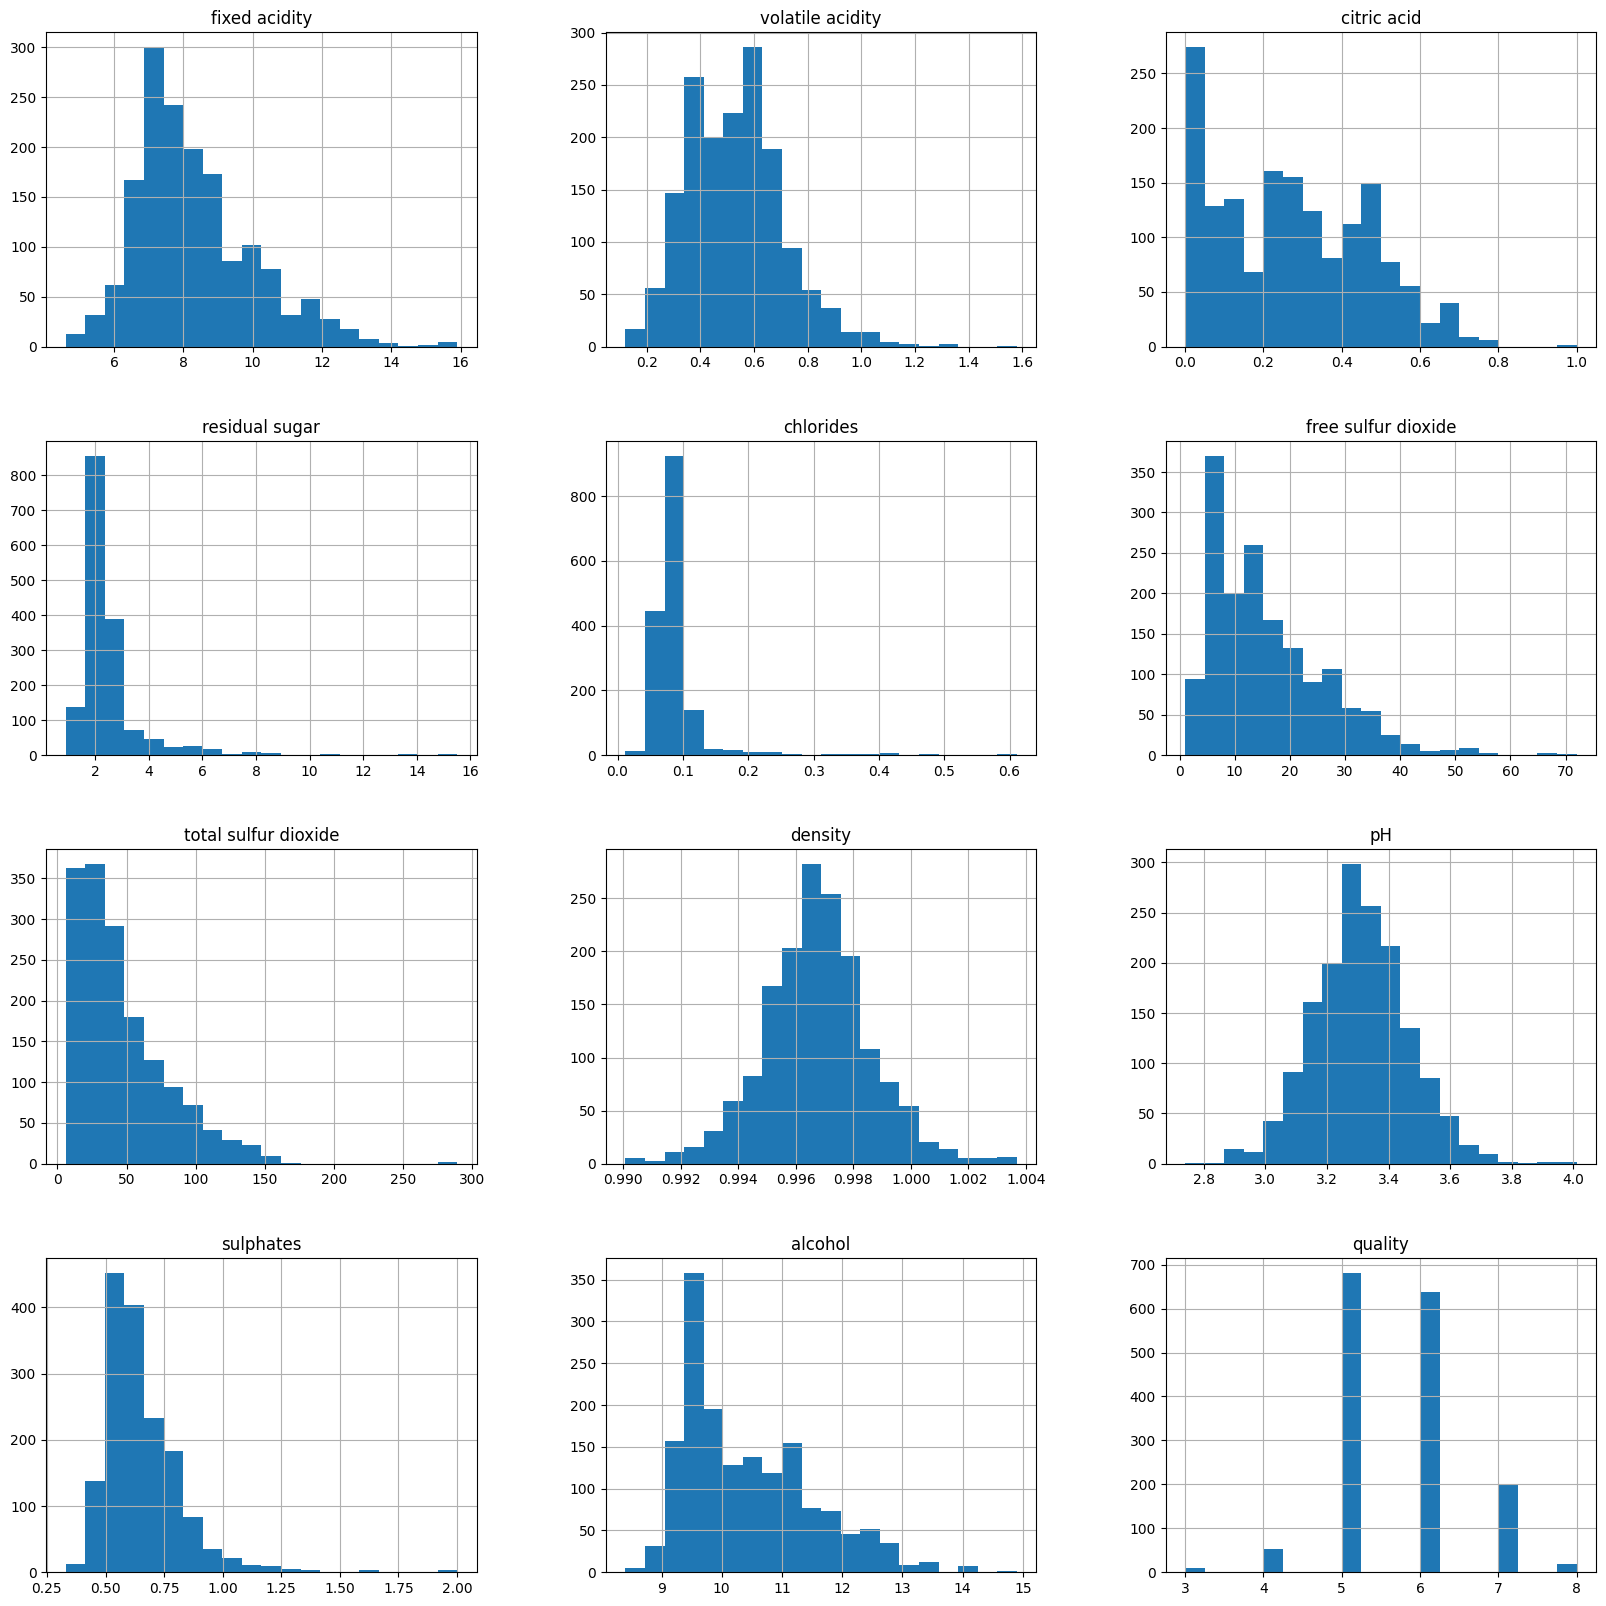

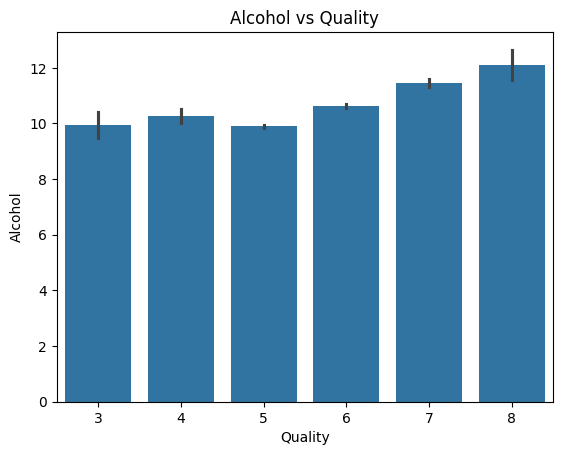

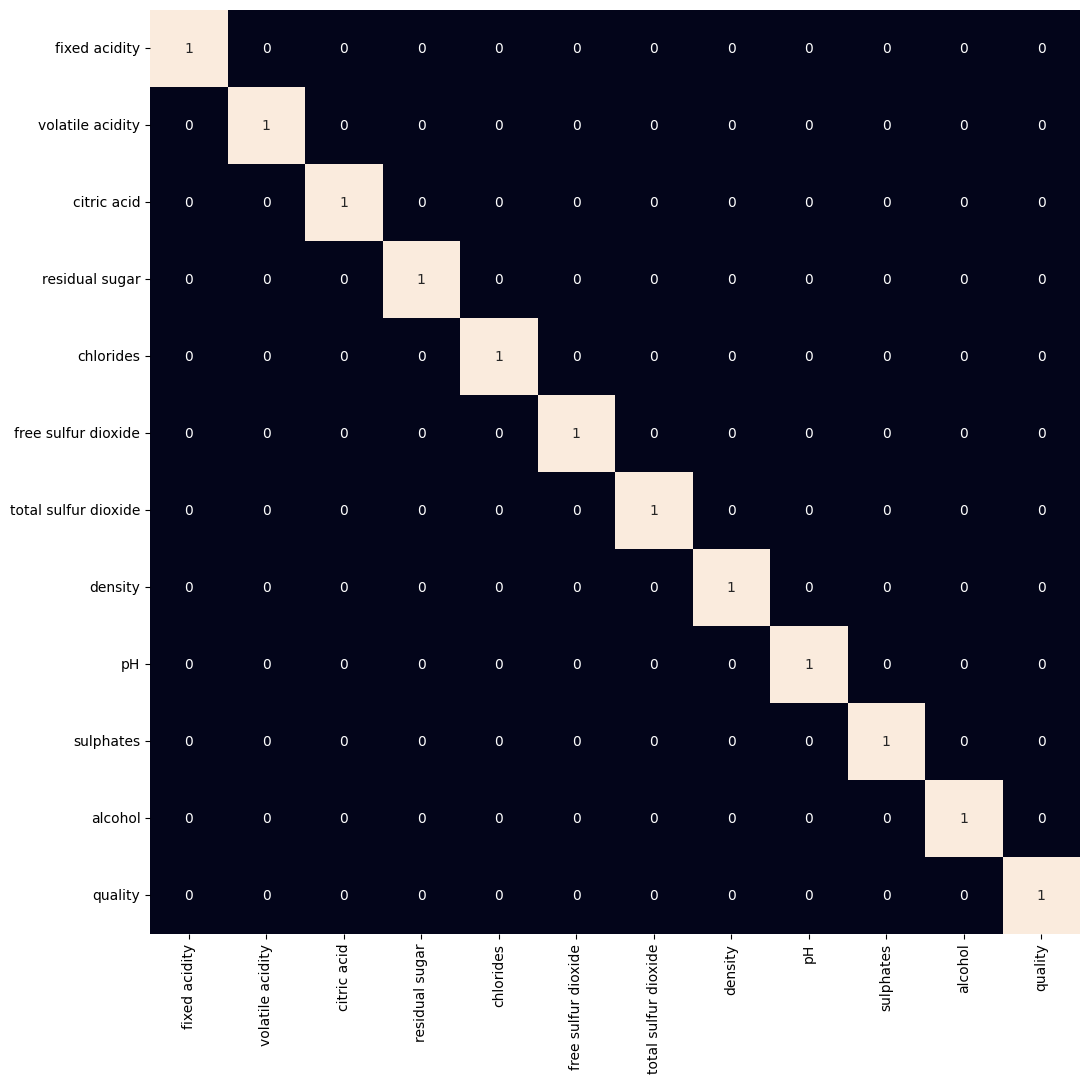

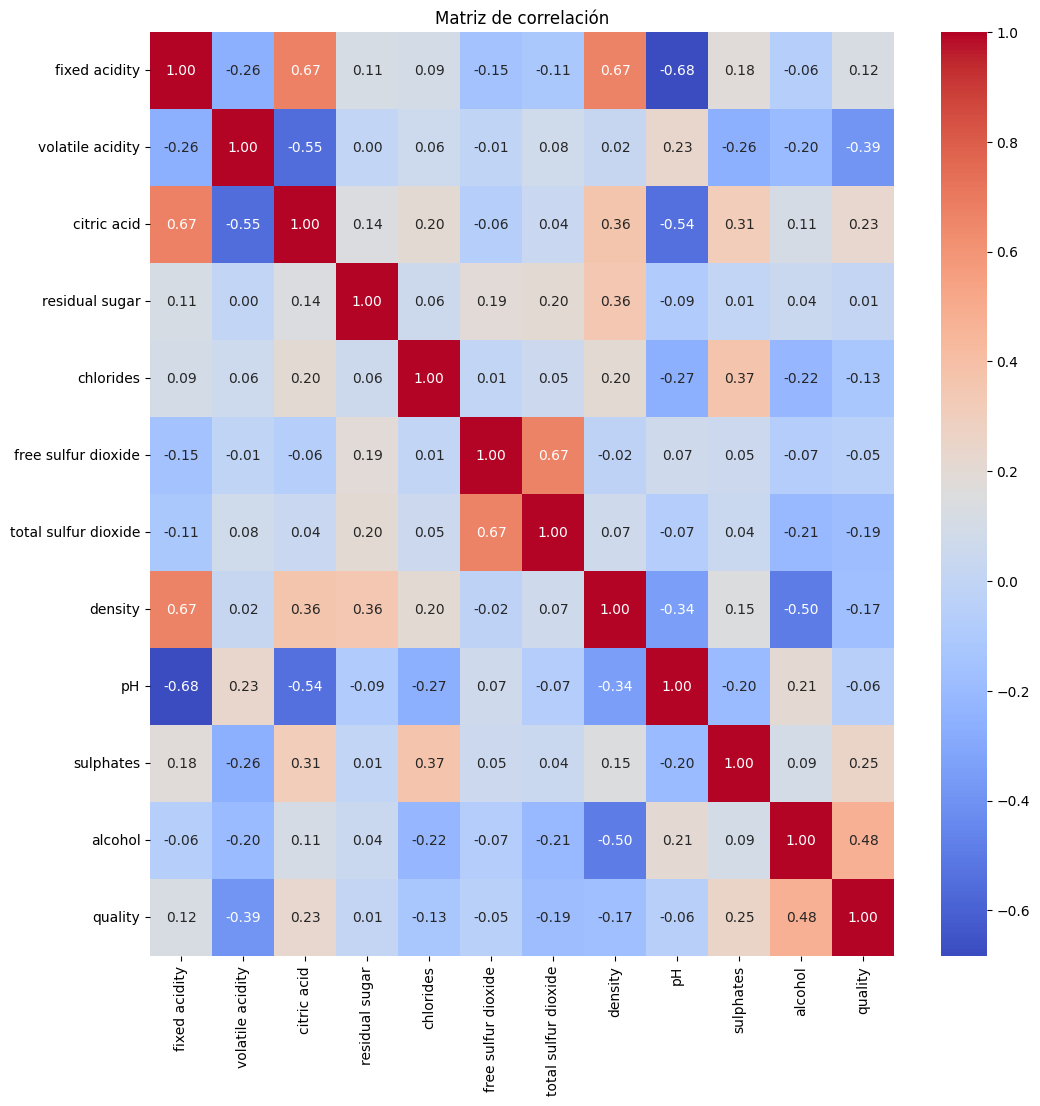

In [ ]:
# Creamos un Histograma para visualizar la distribución de los datos.
df.hist(bins=20, figsize=(20, 20))
plt.show()

# Ahora dibujamos un gráfico de barras para visualizar los totales por la columna de calidad
sb.barplot(x='quality', y='alcohol', data=df)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Alcohol vs Quality')
plt.show()

# Datos numericos
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

3. Aplicación de PCA:
* Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
* Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

In [ ]:
# Primero, entrenamos sin PCA
# Dividiremos los datos de pruebas con los datos de test
features = df.drop(['quality'], axis=1)
features = features.fillna(features.mean())
target = df['quality']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40, )

# Imputar valores faltantes despúes de la división
imputer = SimpleImputer(strategy='mean')  # o 'median'
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

# Visualizamos los sets de entrenamiento y prueba
impXtrainShape = xtrain.shape
impXtestShape = xtest.shape
print(f'Sin Normalizar:\n    XtrainShape:   {impXtrainShape}\n    XtestShape:   {impXtestShape}')

# Normalizar los datos para un mejor entrenamiento
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)
impXtrainShape = xtrain.shape
impXtestShape = xtest.shape
print(f'Normalizado:\n    XtrainShape:  {impXtrainShape}\n    XtestShape:    {impXtestShape}')

Sin Normalizar:
    XtrainShape:   (1279, 11)
    XtestShape:   (320, 11)
Normalizado:
    XtrainShape:  (1279, 11)
    XtestShape:    (320, 11)


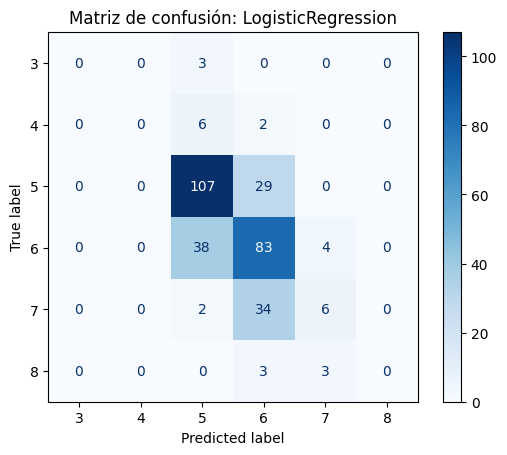

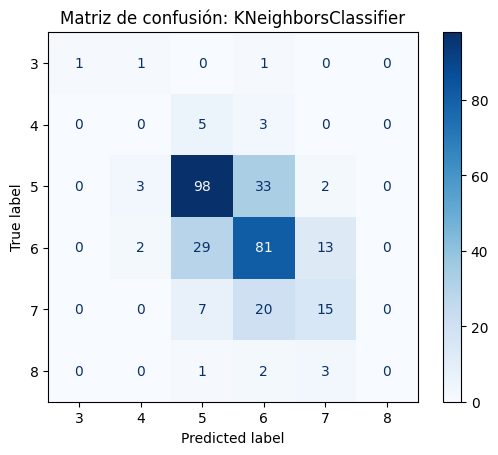

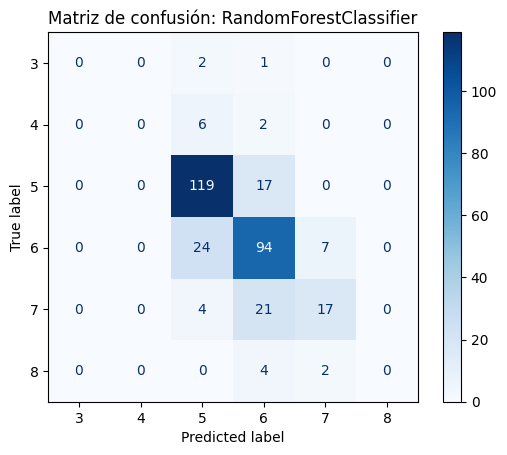

                   Modelo  Accuracies    Recall    FScore
0      LogisticRegression    0.612500  0.612500  0.649950
1    KNeighborsClassifier    0.609375  0.609375  0.620954
2  RandomForestClassifier    0.718750  0.718750  0.746108


In [46]:
# Deinimos una funcion para entrenar modelos y que nos devuelva una tabla con los resultados
def entrenarModelos(xtrain, xtest, ytest):
    models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=5), RandomForestClassifier(n_estimators=100,class_weight='balanced')]
    columns = ['LogisticRegression','KNeighborsClassifier', 'RandomForestClassifier']
    result1=[]
    result2=[]
    result3=[]

    # Entrenamos los modelos
    for i in range(3):
        models[i].fit(xtrain, ytrain)
        pre=models[i].predict(xtest)
        accuracy=accuracy_score(pre, ytest)
        recall=recall_score(pre, ytest, average='weighted')
        f1=f1_score(pre, ytest, average='weighted')
        result1.append(accuracy)
        result2.append(recall)
        result3.append(f1)
        cm = confusion_matrix(ytest, pre)
        ConfusionMatrixDisplay(cm, display_labels=np.unique(ytest)).plot(cmap='Blues')
        plt.title(f"Matriz de confusión: {type(models[i]).__name__}")
        plt.show()
        
    ResultadoSinPCA= pd.DataFrame({'Modelo':columns,'Accuracies':result1,'Recall':result2,'FScore':result3})
    return ResultadoSinPCA
    
# Ejecutar entrenamiento sin PCA
ResultadoSinPCA = entrenarModelos(xtrain, xtest, ytest)
print(ResultadoSinPCA)



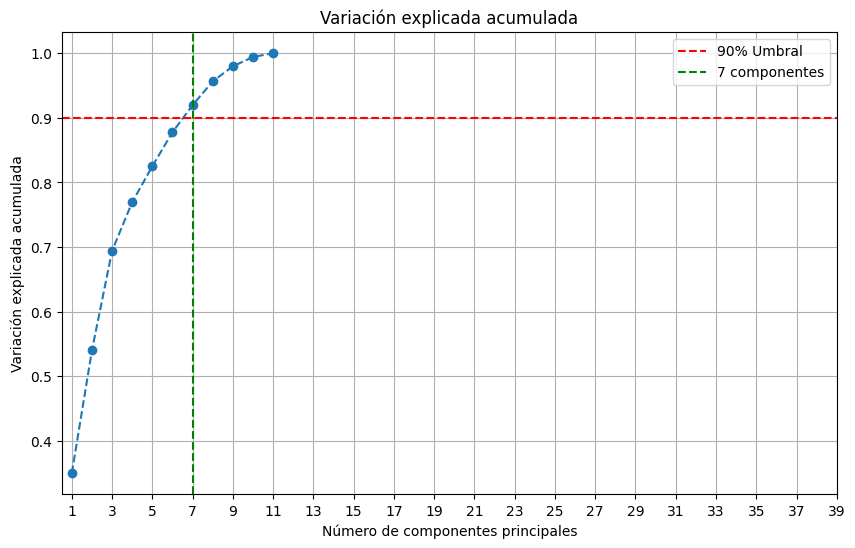

Variación explicada acumulada:
Componente 1: 35.00%
Componente 2: 54.05%
Componente 3: 69.42%
Componente 4: 76.96%
Componente 5: 82.52%
Componente 6: 87.77%
Componente 7: 91.98%
Componente 8: 95.65%
Componente 9: 97.98%
Componente 10: 99.42%
Componente 11: 100.00%


In [ ]:
# Analisamos cuantos componentes es óptimo usar
pca_full = PCA(n_components=11)
pca_full.fit(xtrain)

# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, 41, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")


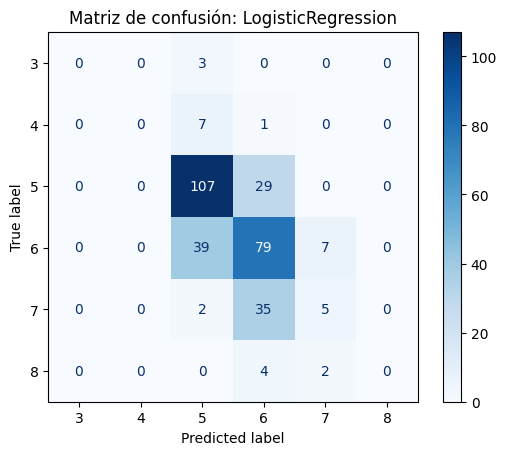

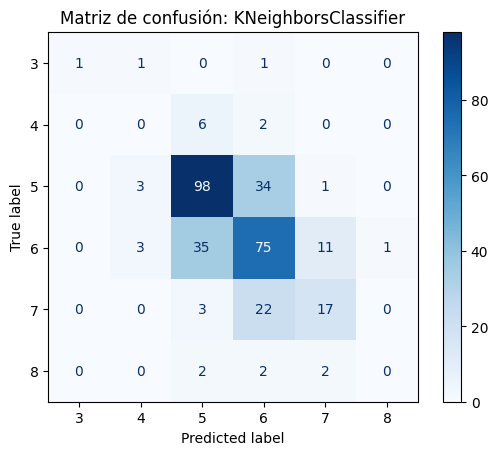

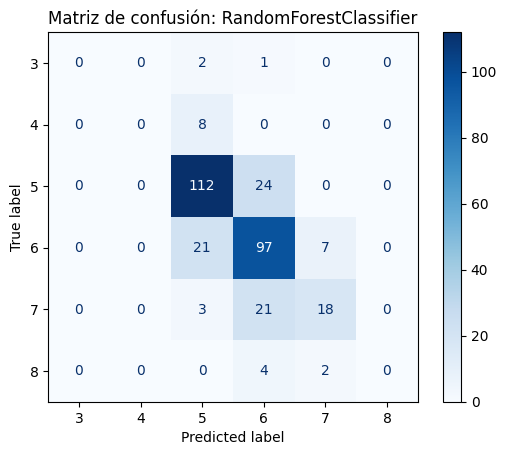

                   Modelo  Accuracies    Recall    FScore
0      LogisticRegression    0.596875  0.596875  0.634883
1    KNeighborsClassifier    0.596875  0.596875  0.605935
2  RandomForestClassifier    0.709375  0.709375  0.734076


In [47]:
# Volvemos a ejecutar el mismo paso anterior, pero antes ejecutamos el PCA.
# Utilizamos 7 componentes
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(xtrain)
X_test_pca = pca.transform(xtest)

# EJecutar entrenamiento con PCA
ResultadoConPCA = entrenarModelos(X_train_pca, X_test_pca, ytest)
print(ResultadoConPCA)

4. Interpretación de los componentes principales:
* Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
* Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

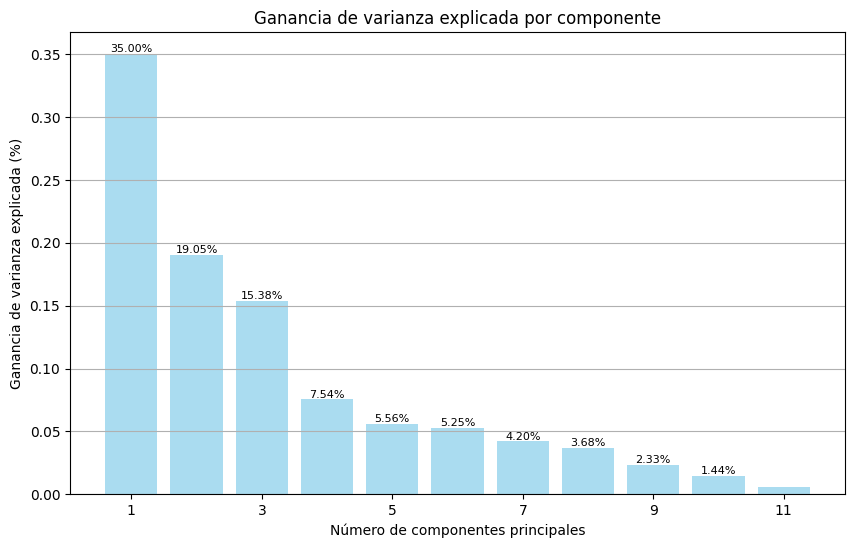

Ganancia de varianza explicada por componente:
Componente 1: 35.00%
Componente 2: 19.05%
Componente 3: 15.38%
Componente 4: 7.54%
Componente 5: 5.56%
Componente 6: 5.25%
Componente 7: 4.20%
Componente 8: 3.68%
Componente 9: 2.33%
Componente 10: 1.44%
Componente 11: 0.58%


In [37]:
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, 12), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, 12, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")


5. Visualización y comparación:
* Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
* Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

In [ ]:
# Comparar los 2 principales componentes
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance[0]:.2%}")
print(f"Componente 2: {explained_variance[1]:.2%}")

# Mostrar la varianza explicada acumulada con 7 componentes
explained_variance_31 = pca.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 7 componentes: {explained_variance_31:.2%}")

Varianza explicada por cada componente principal:
Componente 1: 35.00%
Componente 2: 19.05%
Varianza explicada total con 31 componentes: 91.98%


### Análisis de Resultados:
* Realiza un análisis detallado sobre cuántos componentes principales son necesarios para capturar una cantidad significativa de variabilidad. Discute la importancia de las variables que más contribuyen a los primeros componentes.
* Explica cómo PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características.

In [ ]:
# Son necesarios 7 Componentes para capturar más de 90% de representación de los datos. Los 2 primeros componentes contribuyen al 55% de los datos,
# o del peso de los datos, para entrenar al modelo.

# PCA es util para mejorar el rendimiento en cuanto a tiempo de entrenamiento del momento. Hay una cierta pérdida en precisión, pero esto puede 
# compensarse mejorando los parámetros del modelo o hiperparámetros

### Conclusión:
  – Esta actividad tiene como objetivo principal aplicar PCA para la reducción de dimensionalidad en un dataset real. Al reducir la dimensionalidad, PCA facilita la creación de modelos más interpretables y eficientes.